# Bayesian SIR Model with Change Points

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## Data Simulation

In [2]:
def sim_dataset(chg_pt, scenarios, T, N, S0, I0, R0, n_datasets):

    n_sc = scenarios.shape[0]

    # create array of transmission and removal rate parameters at each time step
    beta  = np.array([[scenarios[i,(chg_pt <= t+1).sum(),0] for t in range(T)] for i in range(n_sc)])
    gamma = np.array([[scenarios[i,(chg_pt <= t+1).sum(),1] for t in range(T)] for i in range(n_sc)])


    Delta_I = np.zeros(shape=(n_datasets, n_sc, T), dtype=np.int32)
    Delta_R = np.zeros(shape=(n_datasets, n_sc, T), dtype=np.int32)
    S       = np.zeros(shape=(n_datasets, n_sc, T), dtype=np.int32)
    I       = np.zeros(shape=(n_datasets, n_sc, T), dtype=np.int32)
    R       = np.zeros(shape=(n_datasets, n_sc, T), dtype=np.int32)

    Delta_I[:,:,0] = binom.rvs(S0, 1-np.exp(-beta[:,0]*I0/N), size=(n_datasets, n_sc))
    Delta_R[:,:,0] = binom.rvs(I0, gamma[:,0], size=(n_datasets, n_sc))
    S[:,:,0]       = S0 - Delta_I[:,:,0]
    I[:,:,0]       = I0 + Delta_I[:,:,0] - Delta_R[:,:,0]
    R[:,:,0]       = R0 + Delta_R[:,:,0]

    for t in range(1, T):
        Delta_I[:,:,t] = binom.rvs(S[:,:,t-1], 1-np.exp(-beta[:,t]*I[:,:,t-1]/N))
        Delta_R[:,:,t] = binom.rvs(I[:,:,t-1], gamma[:,t])
        S[:,:,t]       = S[:,:,t-1] - Delta_I[:,:,t]
        I[:,:,t]       = I[:,:,t-1] + Delta_I[:,:,t] - Delta_R[:,:,t]
        R[:,:,t]       = R[:,:,t-1] + Delta_R[:,:,t]

    return Delta_I, Delta_R, S, I, R

In [3]:
def plot_SRI(S, I, R, sc=0, d=None, start_cond=(999_950, 50, 0), tot=1_000_000, time=100):

    if d is None:
        S = np.expand_dims(np.mean(S, axis=0), 0)
        I = np.expand_dims(np.mean(I, axis=0), 0)
        R = np.expand_dims(np.mean(R, axis=0), 0)
        d = 0

    S = np.concatenate([[start_cond[0]], S[d,sc]])
    I = np.concatenate([[start_cond[1]], I[d,sc]])
    R = np.concatenate([[start_cond[2]], R[d,sc]])

    # plot
    fig, ax = plt.subplots()

    y = np.vstack([S, I, R])
    ax.stackplot(np.arange(time+1), y/tot, labels=["S","I","R"], alpha=0.8)

    ax.set_xlabel("Day")
    ax.set_ylabel("Proportion")
    ax.set_xticks(np.concatenate([[0], np.arange(25, time+1, 25)]))
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.legend(loc="upper right")

    plt.show()

### Example

In [4]:
T = 100
N = 1_000_000

chg_pt = np.array([26, 51, 76])

sc_1 = [(0.3, 0.05), (0.4, 0.15), (0.25, 0.2),  (0.2,  0.25)]
sc_2 = [(0.4, 0.1),  (0.4, 0.25), (0.25, 0.25), (0.25, 0.4) ]
sc_3 = [(0.5, 0.1),  (0.3, 0.3),  (0.4,  0.2),  (0.2,  0.4) ]
scenarios = np.array([sc_1, sc_2, sc_3])

S0 = N-50
I0 = 50
R0 = 0

n_datasets = 100

Scenario 1:


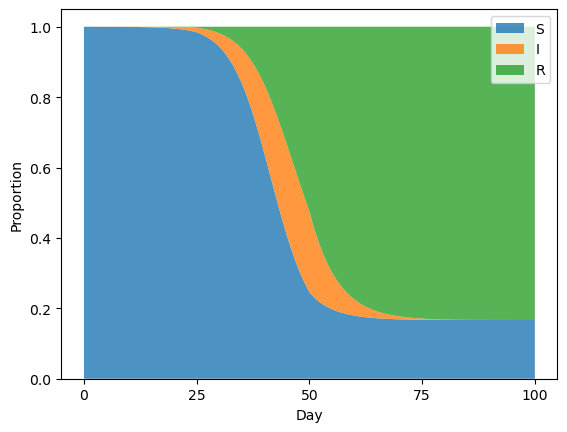

Scenario 2:


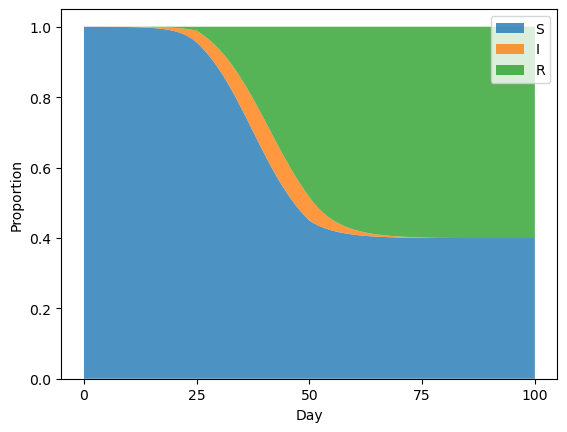

Scenario 3:


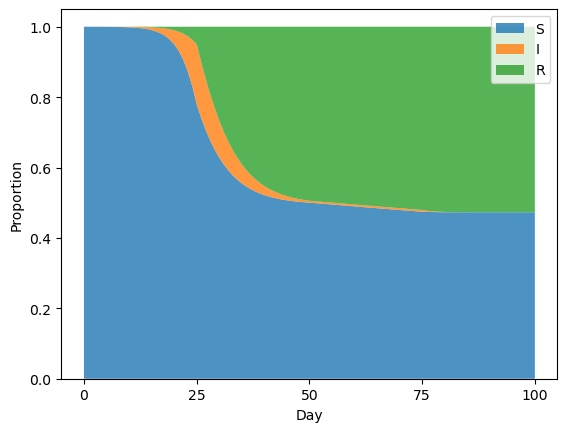

In [5]:
Delta_I, Delta_R, S, I, R =  sim_dataset(chg_pt, scenarios, T, N, S0, I0, R0, n_datasets)
for i in range(len(scenarios)):
    print(f"Scenario {i+1}:")
    plot_SRI(S, I, R, sc=i)